<a href="https://colab.research.google.com/github/caiocgomes/SenhorDasLLMs/blob/main/Aula_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 18
## Exemplo 3 - Revisitando Fibonacci.

Como vocês podem ter visto, o cálculo do Fibonacci não é um dos mais eficientes.  Vamos ver isso. Primeiro, vamos lembrar como haviamos definido a função:

In [ ]:
def fibonacci(n):
  if (n==1):
    return 0
  elif (n==2):
    return 1
  else:
    return fibonacci(n-1) + fibonacci(n-2)

Se eu rodo para um numero pequeno, ele roda bastante rápido. Mas se eu rodo para um numero grande, ele vai demorar bastante. Vamos ver para 5 e 20.




In [ ]:
%timeit fibonacci(5)
%timeit fibonacci(20)

1.5 µs ± 303 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.19 ms ± 325 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Nós calculamos um numero de fibonacci 4 vezes maior e o tempo de execução demorou 1000 vezes mais!

Isso acontece pq a cada execução da função, duas novas chamadas da função são feitas. Então para o numero 5 nós imaginamos umas 32 chamadas. Para o número 20, seriam da ordem de 1 milhão de chamadas!

Para resolver isso, nós queremos reaproveitar os cálculos que já foram feitos. Existem muitas repetições, e assim eu cortoe diversas execuções repetidas. Para fazer isso, vamos aprender sobre outro container que não falamos na última aula: o dicionário (dict).

## Dicionários (Dict)

O dicionário é um container parecido com a lista. Ele serva para empilhar numeros diferentes. Só que em vez de agrupar somente valores, ele agrega uma tupla (2-upla) de chave-valor. Vamos ver um exemplo pra ficar mais claro. Enquanto a lista é representada por [], o dicionário é por {}. Ou seja

```python
lista = []
dicionario = {}
```



In [ ]:
pessoa = {"nome":"caio", "sobrenome":"gomes","idade": 40}
pessoa

{'nome': 'caio', 'sobrenome': 'gomes', 'idade': 40}

Então aqui, eu consigo guardar a informação com a chave que ela representa. Então se eu quero saber só o nome da pessoa, eu entraria
```python
pessoa['nome']
```

e isso me responderia *caio*.

E eu posso misturar listas com dicionários.

In [ ]:
equipe = []
pessoa = {"nome":"caio", "sobrenome":"gomes","idade": 40}

equipe.append(pessoa)

pessoa = {"nome":"victor", "sobrenome":"caparica","idade": 42}

equipe.append(pessoa)

equipe

[{'nome': 'caio', 'sobrenome': 'gomes', 'idade': 40},
 {'nome': 'victor', 'sobrenome': 'caparica', 'idade': 42}]

(ps: aqui agradecimentos ao meu querido amigo Victor Caparica que tenho discutido os tópicos destas aulas).

Com isso, eu vou ter uma lista, e dentro desta lista, em vez de colocar numeros, estou colocando dicionarios que vão guardar as informações diferentes. Isto permite guardar uma informação mais estruturada.

## Voltando a Fibonacci

Com os dicionários, isso me facilita a vida. Em vez de recalcular todos os números, eu posso fazer o seguinte: Se o número já foi calculado, eu salvo ele em uma memória. E se não foi, eu faço o cálculo. Isso vai diminuir em muitas vezes o numero de chamadas das funções e vai acelerar o cálculo em muitas ordens de grandeza.

Vamos ver como seria isso!

In [ ]:
def fibonacci_memoria(n, memoria):
  if n in memoria:
    return memoria[n]
  if n == 1:
    return 0
  elif n == 2:
    return 1
  else:
    memoria[n] = fibonacci_memoria(n-1, memoria) + fibonacci_memoria(n-2,memoria)
    return memoria[n]


In [ ]:
memoria = {}
print(fibonacci(5))
print(fibonacci_memoria(5,memoria ))

memoria = {}

print(fibonacci(20))
print(fibonacci_memoria(20,memoria ))

3
3
4181
4181


Ufa! Ambos deram o mesmo resultado. Mas vamos ver agora o tempo de cálculo. Vamos ver! (como vc poderia reescrever o código abaixo usando loops? Será que vc consegue?)



In [ ]:
memoria = {}
%timeit fibonacci(5)
%timeit fibonacci_memoria(5,memoria )

memoria = {}

%timeit fibonacci(20)
%timeit fibonacci_memoria(20,memoria )


1.51 µs ± 367 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
215 ns ± 59.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.16 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
195 ns ± 46.5 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


O código rodou 11 mil vezes mais rápido para fibonacci igual a 20. E com isso podemos rodar fibonacci para 100 até, que era impossivel antes!


In [ ]:
memoria = {}
%timeit fibonacci_memoria(100,memoria )


185 ns ± 7.09 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Opcional: Como fazer isso ainda mais rápido

Aqui vamos num opcional, só pra mostrar que podemos otimizar ainda mais esse código. Aqui nós construimos fibonnaci de cima para baixo. Eu cálculo $F_n$, e ai eu faço $F_{n-1}$, ai $F_{n-2}$. Mas é possivel fazer o contrário. Eu sei que $F_1$ e $F_2$ eu consigo cálcular $F_3$. E ai com $F_2$ e $F_3$ eu calculo $F_4$. Então daria pra fazer isso ainda mais eficiente, fazendo o código desta maneira:

In [ ]:
def fibonacci_eficiente(n):
    if n == 1:
        return 0
    elif n == 2:
        return 1

    prev, curr = 0, 1
    for _ in range(3, n + 1):
        prev, curr = curr, prev + curr
    return curr


In [ ]:
memoria = {}
%timeit fibonacci_memoria(100,memoria )
%timeit fibonacci_eficiente(100)

209 ns ± 48 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
6.08 µs ± 83.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Este último é um pouco mais lento, mas não usa mais memória para cálculo. Então ele permite cálcular valores muito grandes da série.


In [ ]:
%timeit fibonacci_eficiente(100000)

141 ms ± 35.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


A versão inicial do nosso código seria $2^{1000}$ vezes mais lenta! Ou seja, 10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376 vezes mais lento.

## Objetos

Programação orientada a objetos é um dos tópicos mais importantes da programação e com certeza não é possivel abordar em uma introdução de duas aulas. Não seria possivel em dois meses.

Mas para que vocês consigam ler o código em que aparecem objetos, eu vou fazer uma explicação muito simples e mostrar alguns exemplos de como podemos usar objetos.

Na aula passada nós vimos o que são funções. Uma função é algo (vamos imaginar que é uma maquina que transforma matéria prima num produto).

Então nós fizemos, na aula passada, a maquina que transforma uma lista de numeros na soma da lista.

```python
def soma_lista(lista):
  # Observe que a lista vai ser passada na função. Então eu nao preciso definir ela
  a = 0
  for numero in lista:
    print(numero)
    a = a + numero
  print(f"O resultado é {a}")
  return a
```


Isso é muito util, mas podemos fazer uma coisa melhor. Algumas vezes nós queremos programar processos que sejam independentes. Imagine um jogo. Dentro desse jogo tem carros que se movimentam. Eu poderia fazer que, para movimentar o carro eu colocasse ele numa função que ia receber como entrada a posição atual do carro, a velocidade atual do carro e me devolveria a posição final dele. Só que isso é um saco. Eu preciso manter uma variável para cada posição do carro, eu preciso manter uma variável para cada velocidade de cada carro.

Para facilitar isso, surgem os objetos. Vamos imaginar que o objeto é uma *coisa* que pode se multiplicar, que tem memoria de algumas propriedades e tem funções que atuam sobre essas propriedades.
Deixe-me criar um objeto carro aqui, e ai vai ficar mais claro para vocês.

```python
class Carro(object):
  def __init__(self,marca,cor,posicao_inicial,velocidade_inicial):
    self.marca = marca
    self.cor = cor
    self.posicao = posical_inicial
    self.velocidade = velocidade_inicial
  def update_posicao(self,delta_t):
    self.posicao = self.posicao + self.velocidade * delta_t
  def pinta_carro(self,nova_cor):
    self.cor = nova_cor
```

esse é um exemplo bem simples. Mas agora essa coisa Chamada carro vai manter todas as propriedades daquele carro no jogo, mas também vai ter as funções que vão atuar pelas propriedades dele. Então para o programa, cada carro do jogo vai ser representado por uma *instancia* da classe carro. Essa instancia é o que chamamos de objeto.

Voces percebem que existe uma função dentro da classe (quando a função está dentro da classe, nós chamamos ela de *método*) que se chama *__init__* ? Esse é um método bastante especial que é chamado *construtor*. O construtor é chamado quando uma instância nova do objeto é criada, e é ali que são colocadas as coisas que vão ser feita para construir o objeto. Então nesse caso, ele vai pegar algumas informações que você passou (*marca, cor, posicao inicial e velocidade inicial*) e vai quardar elas como propriedades do objeto. Em alguns casos, você pode fazer coisas muito mais complexas, como chamar outras funções, APIs externas, tudo como maneira de construir o objeto.

Então no jogo, quando o persnagem comprasse um carro novo, o que fariamos é

```python
lista_carros.append(Carro("branco","fiat",posicao,velocidade))
```

essa lista, portanto, não seria uma lista de inteiros ou floats. Seria uma lista de objetos "Carro".

E se agora eu quisesse atualizar todas as posições dos carros, eu só faria

```python
for carro in lista_carros:
  carro.update_posicao(delta_t)
```

e todos os carros teriam a posição atualizada.

Como falei, isso não diz muito. É um assunto complicado e muitas vezes é já no meio de um curso de ciencias da computação. Mas é importante entender que os objetos vão ser essas coisas que agregam funções e propriedades. Então eu posso ter um objeto que vai se comunicar com o ChatGPT, outro que vai se comunicar com o Gemini e outro com o LLama. Mas como todos são "herdam"(só jogando o termo aqui) da mesma classa mãe, o código não precisa saber com qual LLM ele está falando. Ele sabe falar com aquele tipo de objeto e eu, como programador, ganho a liberdade de trocar a classe que uso ao bel-prazer.

### Python e Objetos

Aqui está na hora de contar que eu menti para vocês até agora. Não é uma mentira grande, mas foi uma mentira professoral.

Em Python TUDO é um classe. Em linguages de programação existiam os tipos fundamentais, existiam funções. Só que no Python isso não é bem verdade. No Python tudo é uma classe. Voce pode ver isso se olhar o numero 1. Para isso vamos usar *dir*, que te permite mostrar quais os métodos implementados.

In [ ]:
dir(1)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'as_integer_ratio',
 'bit_count',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes

O numero 1 tem vários métodos! Mesmo uma função tem métodos. vamos ver!

In [ ]:
def soma(a,b):
  return a+b

dir(soma)

['__annotations__',
 '__builtins__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

Mas é importante ficar claro. Apesar do Python tudo serem objetos, isso não implica que todo código precisa ser em programação orientada a objetos.

Então na prática, vamos continuar tratando os tipos *primitivos* como tipos primitivos, as funções como função.

## Bibliotecas externas

A grande vantagem do python é que ele permite que você use uma rede enorme de pacotes já prontos, que te permitem não ter que desenvolver tudo do inicio. Isso é muito util. Você não precisa entender como se conectar com a OpenAI. Já existe um pacote pronto que faz isso tudo para você.

Vamos aprender como instalar um pacote a acessar ele aqui do Python.

### Instalando pacotes novos.

A grande maioria dos pacotes em python são instalados diretamente de um repositório de bibliotecas e são feitos usando o pip. Na verdade é bem simples. Você digita

```
pip install <nome_do_pacote>
```

e a mágica acontece. Isso seria um comando para ser dado no terminal do linux. Como aqui estamos dentro de um notebook, usamos então o comando

```
!pip install <nome_do_pacote>
```

Vamos instalar a biblioteca da OpenAI


In [ ]:
!pip install openai

Pronto! ele já foi no site, já baixou, já instalou todas as dependencias e está pronto! (aviso: muitas vezes não é tão facil. Tem umas dependencias que são osso de instalar. Mas todas que vamos usar aqui no curso são tranquilas).



### Instanciando uma biblioteca

Com o *pip* acima nós somente fizemos download da biblioteca. Mas seria impossivel que o python soubesse todas as bibliotecas que você quer usar. Então o que vamos fazer agora é falar para o interpretaor



> Você: *Viu, seu interpretador do Python. Vai la na sua pasta de bibliotecas e deixa essa biblioteca aqui em memória que eu vou usar, viu?*

> Python: *O Doutor. Pode deixar comigo. Se ela tiver lá eu trago pra memória. Aproveitando, você quer que eu chame como essa biblioteca aqui? O nome original ou quer algo seu?*

Em outras palavras. Você vai digitar

```python
import <nome_do_pacote>
```

ou ainda, se voce quer o seu nome

```python
import <nome_do_pacote> as <nome_que_voce_quer>
```

Então você importaria o OpenAI como




In [ ]:
import openai

Vamos agora importar o pandas, a biblioteca de analise de dados mais usada no python. O pandas, meio que por padrão, é importando como pd. Então quase todo código que você vai ver por ai vai fazer isso:


In [ ]:
import pandas as pd

Usar a biblioteca do OpenAI é um pouco mais chato, pq você precisa ativar sua chave para que eles saibam quem você é e que você pague as chamadas. Nós vamos fazer isso na próxima semana.


# Programando em 2024.

Vamos ser sinceros: em 2024 a maior parte dos programadores não faz tudo na mão mais. Desde o inicio do ChatGPT, programação mudou para o ponto que muitas vezes nos pedimos o que queremos, validamos as saídas, fazemos as correções necessárias e passamos para a próxima.

Em primeiro lugar, isso muda já uma coisa que as pessoas entendem errado: Nenhum código de LLMs vai te dar um resultado pronto pra produção. Eles conseguem te dar direções gerais. Mas o papel do programador é ler o código, entender as fraquezas, fazer as alteráções manuais ou pedir novas mudanças para a LLM. Além disso, nenhuma LLM vai ter a compreensão da melhor arquitetura do sistema. Isso tudo é papel do programador.

O que quero dizer com isso: o problema não está em usar LLMs. É em usar LLMs e acreditar cegamente no resultado. Todo resultado que eu recebo via LLMs eu altero para minhas necessidades. Quem fala que consegue trocar o time inteiro pelas LLMs não entendeu como funciona.

## Como eu usaria LLMs para refazer o código do Fibonacci.

O Código do Fibonacci eu sei identificar os problemas ao olhar pra ele. Mas como eu teria feito isso?

Em primeiro lugar, se eu nunca tivesse feito antes, eu teria escrito o código inicial.

```python
def fibonnaci(n):
  if (n==1):
    return 0
  elif (n==2):
    return 1
  else:
    return fibonnaci(n-1) + fibonnaci(n-2)
```


A partir deste momento, se não tivesse feito isso antes, eu provavelmente chegaria na sua LLM de preferência (para coding uma das mais usadas agora é o Qwen, da AliBaba. Mas vou usar o Gepeto (aka ChatGPT) pq é o que vocês mais conhecem.

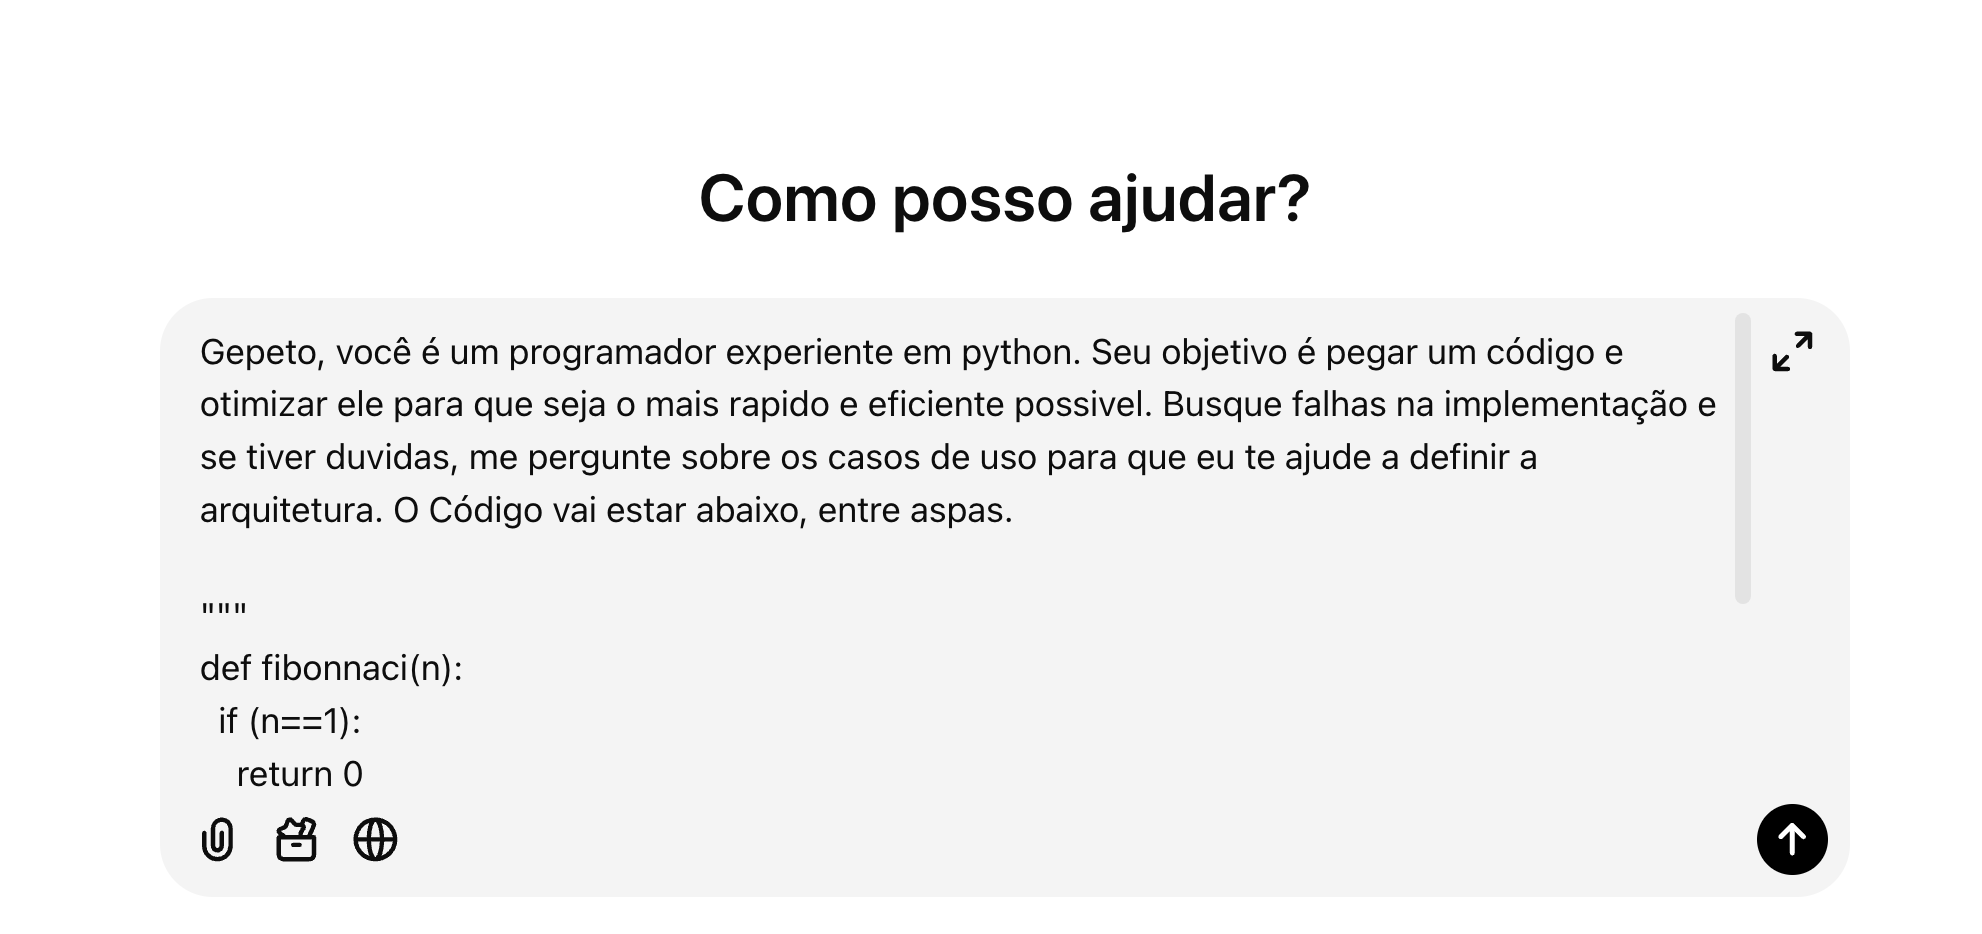

E ele me respondeu:

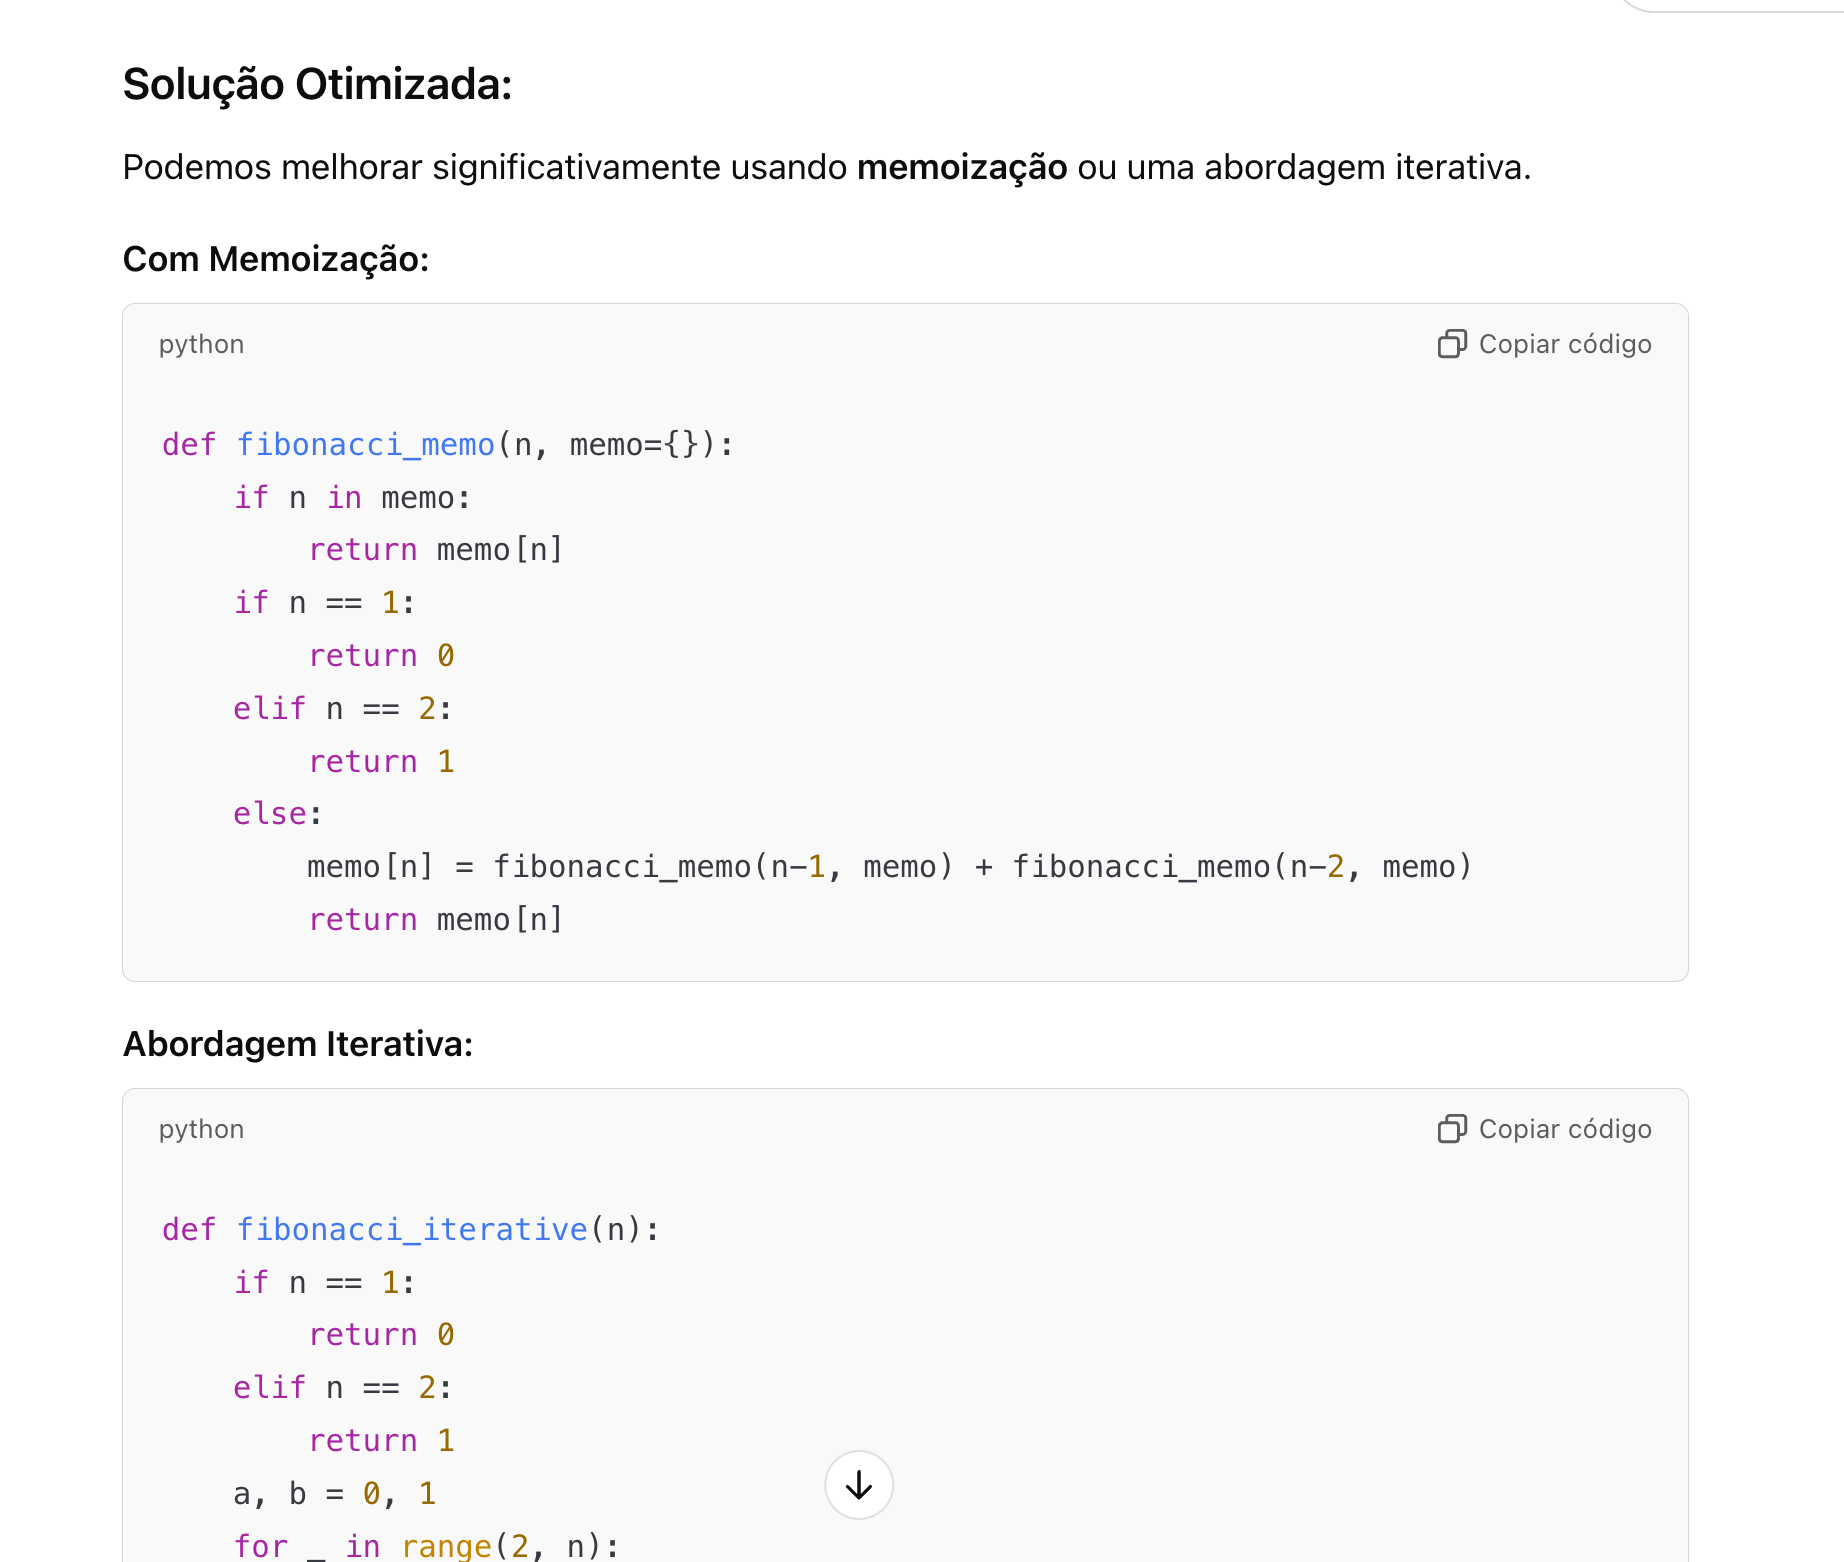